<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Clustering</h1>

## 1. Aims
<div class="alert alert-info"> 
To implement $k$-means and use it to cluster some data.
</div>

In [124]:
import numpy as np
X = np.loadtxt('kmeansdata.txt')

## 2. Implement the $k$-means algorithm covered in the lecture (not the kernelised version)

<div class="alert alert-info">

Hints:
<br>
<ul> 
<li> Your code needs to alternate between assigning points to the cluster that they’re closest to and recalculating the means by taking the average of these points.
<li> You may need to add something to your code to deal with the problem of no points being assigned to a particular cluster – set the mean randomly.
<li> You’ll find it easiest to maintain a variable that indicates which cluster each point is assigned to. Be careful not to assign a point to more than one cluster.
<li> Your algorithm should converge in fewer than 20 steps (or thereabouts). If it takes 100, something isn’t right!
</ul>

</div>

In [125]:
from scipy.spatial.distance import euclidean 

def nearest_centroid(datapoint, centroids):
    return min(enumerate(centroids), key=lambda x: euclidean(datapoint, x[1]))[0]  

def init_centroids(data, k):
    n_samples, _ = data.shape

    # check max number of centroids
    k = np.minimum(k, n_samples)
    
    centroids = list(range(n_samples))
    np.random.shuffle(centroids)
    return [data[centroid] for centroid in centroids[:k]]

def converged(centroids, old_centroids, num_iterations, max_iter, threshold=0):
    if num_iterations > max_iter:
        return True
    return (np.array([euclidean(new, old) \
                      for new, old in zip(centroids, old_centroids)]) <= threshold).all()

def update_centroids(centroids, clusters):
    assert(len(centroids) == len(clusters))
    
    clusters = np.array(clusters)
    
    for i, cluster in enumerate(clusters):
        centroids[i] = np.mean(cluster, axis=0)
    return centroids
  

In [126]:
MAX_ITERATIONS = 100


def kmeans(data, k=2, centroids=None):
    # randomize the centroids if they are not given
    if not centroids:
        centroids = init_centroids(data, k)

    old_centroids = centroids[:]

    iterations = 0
    while True:
        iterations += 1

        # init empty clusters
        clusters = [[] for _ in range(k)] 

        # assign each data point to the closest centroid
        for sample in data:
            # find the closest center of each data point
            centroid_idx = nearest_centroid(sample, centroids)
            
            # assign datapoint to the closest cluster
            clusters[centroid_idx].append(sample)
        
        # keep the current position of centroids before changing them
        old_centroids = centroids[:]
        
        # update centroids
        centroids = update_centroids(centroids, clusters)
        # if the stop criteria are met
        if converged(centroids, old_centroids, iterations, MAX_ITERATIONS):
            break

    return centroids, iterations

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Run with k = 3
Converget at iteration: 10



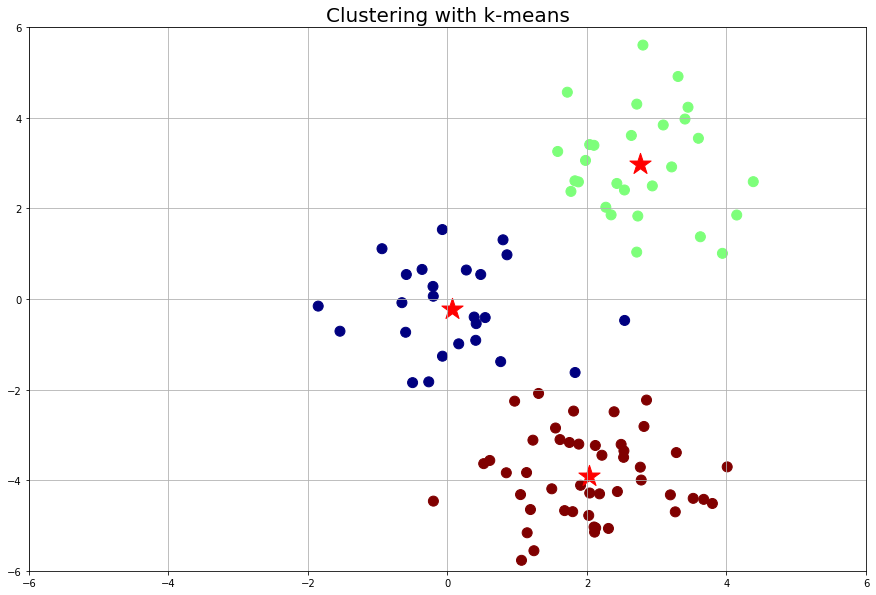

In [127]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_clustering(k):
  centers, iter_num = kmeans(X, k)
  print("Run with k = %d" % k)
  print("Converget at iteration: %d\n" % iter_num)
  centers = np.array(centers)
  labels = [nearest_centroid(p, centers) for p in X]


  fig = plt.figure(1, figsize=(15, 10))
  colormap = cm.get_cmap('jet')
  plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=colormap, s=100)
  plt.scatter(centers[:,0], centers[:,1], c='r', s=500, marker='*')
  plt.title("Clustering with k-means", fontsize=20)
  plt.axis([-6, 6, -6, 6])
  plt.grid()
  plt.show()

plot_clustering(k=3)

## 3. Run your algorithm for $k$ = 2, 3, 4 and 5. 

<div class="alert alert-info">
In each case, plot the data using a different symbol for each cluster.
</fiv>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Run with k = 2
Converget at iteration: 6



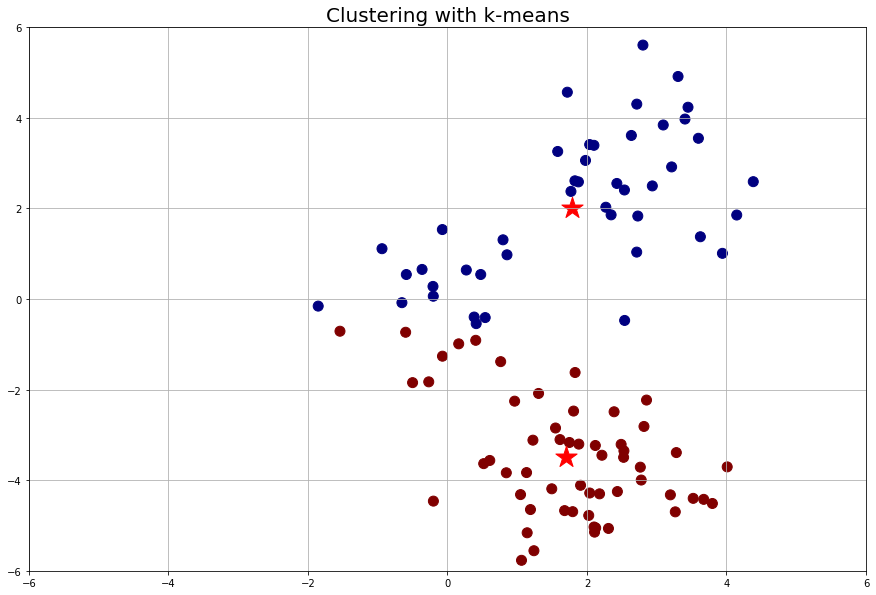

Run with k = 3
Converget at iteration: 9



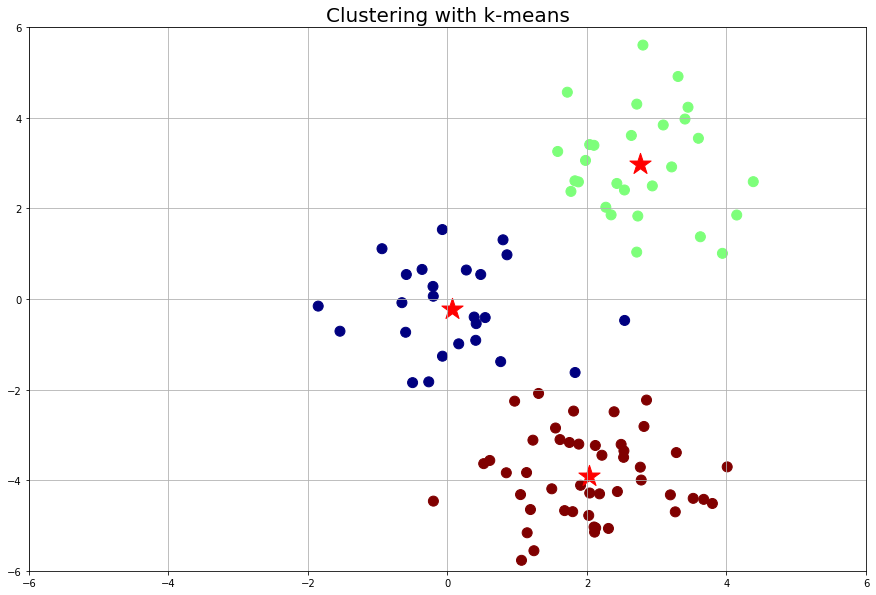

Run with k = 4
Converget at iteration: 3



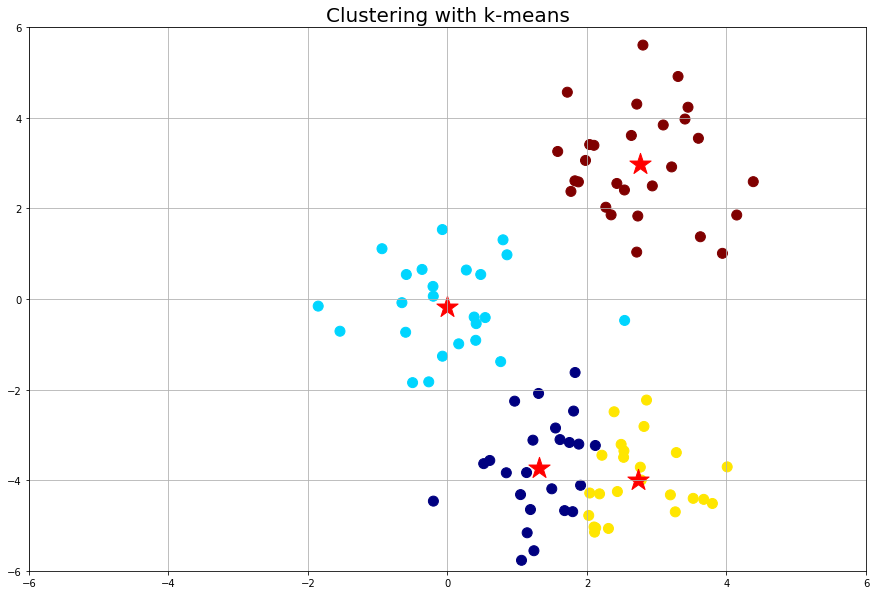

Run with k = 5
Converget at iteration: 5



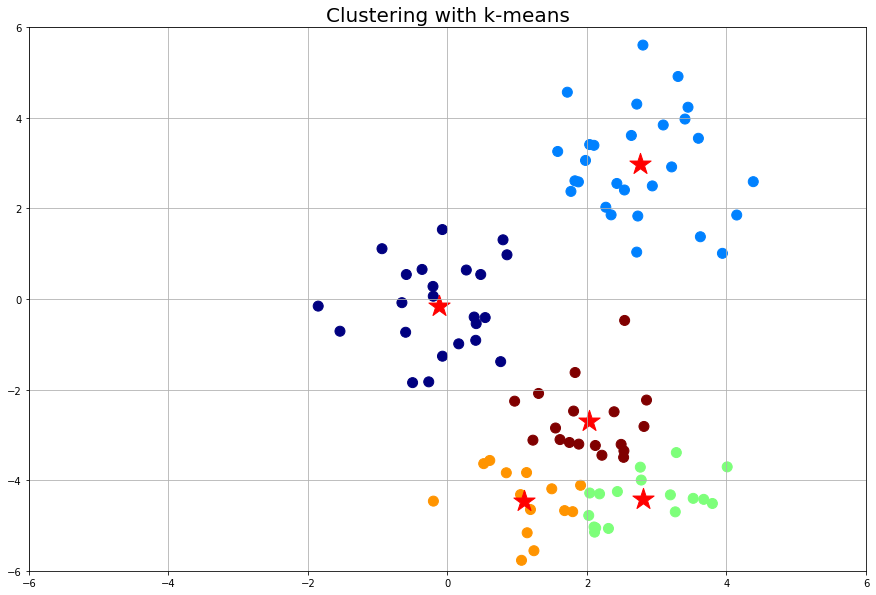

In [128]:
for k in range(2,6):
    plot_clustering(k=k)